In [17]:
import os
import pylab as plt
import numpy as np
import pandas as pd
import astropy.wcs as wcs
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.io import fits
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
from reproject.mosaicking import find_optimal_celestial_wcs

In [16]:
## DFTile field_boundaries.py

def listdir_nohidden(path):
    file_list = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            file_list.append(f)
    return file_list


datadir = './partial_UW_coadds/'


field_list = listdir_nohidden(datadir)

lowerleft_coor = []
upperleft_coor = []
lowerright_coor = []
upperright_coor = []

for i in range(len(field_list)):
    current_field = field_list[i]

    file_name = datadir+str(current_field)
    hdu = fits.open(file_name)
    data = hdu[0].data

    lowerleft_pix = [0, 0]
    upperleft_pix = [0, data.shape[0]]
    lowerright_pix = [data.shape[1], 0]
    upperright_pix = [data.shape[1], data.shape[0]]

    w = wcs.WCS(file_name)

    lowerleft_coor.append(w.wcs_pix2world(lowerleft_pix[0],lowerleft_pix[1], 1))
    upperleft_coor.append(w.wcs_pix2world(upperleft_pix[0],upperleft_pix[1], 1))
    lowerright_coor.append(w.wcs_pix2world(lowerright_pix[0],lowerright_pix[1], 1))
    upperright_coor.append(w.wcs_pix2world(upperright_pix[0],upperright_pix[1], 1))
    

'write fields boundary coordinates into a file'
f = open('./partial_DFTile/fields_boundaries.txt', 'w')
f.write('# field name\n')
f.write('# lower left x\n')
f.write('# lower left y\n')
f.write('# upper left x\n')
f.write('# upper left y\n')
f.write('# lower right x\n')
f.write('# lower right y\n')
f.write('# upper right x\n')
f.write('# upper right y\n')

for i in range(len(lowerleft_coor)):
    print(i)
    f.write(str(field_list[i])+'\t'
        +str(lowerleft_coor[i][0])+'\t'+str(lowerleft_coor[i][1])+'\t'
        +str(upperleft_coor[i][0])+'\t'+str(upperleft_coor[i][1])+'\t'
        +str(lowerright_coor[i][0])+'\t'+str(lowerright_coor[i][1])+'\t'
        +str(upperright_coor[i][0])+'\t'+str(upperright_coor[i][1])+'\n')
    
    print(str(field_list[i])+'\t'
        +str(lowerleft_coor[i][0])+'\t'+str(lowerleft_coor[i][1])+'\t'
        +str(upperleft_coor[i][0])+'\t'+str(upperleft_coor[i][1])+'\t'
        +str(lowerright_coor[i][0])+'\t'+str(lowerright_coor[i][1])+'\t'
        +str(upperright_coor[i][0])+'\t'+str(upperright_coor[i][1])+'\n')
    
f.close()

0
UW1893_coadd_g.fits	318.4683303723181	-2.7540429692045465	318.46603424766954	0.1949030207723203	314.4735967980341	-2.754044131076465	314.47589212610694	0.19490310293477464

1
UW1408_coadd_g.fits	245.23186377261788	43.70141273124589	245.37868303192204	46.648544411716045	239.71162714996177	43.70143581373389	239.56485869978746	46.64856999646735

2
UW1448_coadd_g.fits	243.28629090314325	45.50425230242731	243.44786234398563	48.45114004005475	237.5918930980516	45.50427688460445	237.43037755295748	48.45116729349243

3
UW1816_coadd_g.fits	316.00777458977745	-6.361839287613302	315.99895288929224	-3.412905500614067	311.99292307400395	-6.36184198054607	312.00174171409964	-3.41290694104188

4
UW1487_coadd_g.fits	245.09260599019404	47.30694878922572	245.27084034600335	50.25355849953086	239.20668851010052	47.306974970225454	239.02851579118752	50.25358754434976

5
UW1449_coadd_g.fits	246.90904210314326	45.50425230242731	247.07061354398564	48.45114004005475	241.2146442980516	45.50427688460445	241.05

In [20]:
WCS.wcs_pix2world?

Signature: WCS.wcs_pix2world(self, *args, **kwargs)
Docstring:
Transforms pixel coordinates to world coordinates by doing
only the basic `wcslib`_ transformation.

No `SIP`_ or `distortion paper`_ table lookup correction is
applied.  To perform distortion correction, see
`~astropy.wcs.WCS.all_pix2world`,
`~astropy.wcs.WCS.sip_pix2foc`, `~astropy.wcs.WCS.p4_pix2foc`,
or `~astropy.wcs.WCS.pix2foc`.

Parameters
----------
args : flexible
    There are two accepted forms for the positional arguments:

        - 2 arguments: An *N* x *naxis* array of coordinates, and an
          *origin*.

        - more than 2 arguments: An array for each axis, followed by
          an *origin*.  These arrays must be broadcastable to one
          another.

    Here, *origin* is the coordinate in the upper left corner of the
    image.  In FITS and Fortran standards, this is 1.  In Numpy and C
    standards this is 0.


    For a transformation that is not two-dimensional, the
    two-argument form must b

In [23]:
# tile_centers.py -- going to require *serious* modification, I think...

# lower left corner: G09_130.5_m1
# upper left corner G09_130.5_1
# lower right corner: G15_222_m1
# upper right corner: G15_222_1

# # get the lower left corner pixel
# image1 = datadir+'UW1409_coadd_g.fits'
# hdu1 = fits.open(image1)
# data1 = hdu1[0].data
# wcs1 = wcs.WCS(image1)
# # lowerleft_pix = [0, 0]
# lowerright_pix = [data1.shape[1], 0]
# lowerright_coor = wcs1.wcs_pix2world(lowerright_pix[0],lowerright_pix[1], 1)

# # get the upper left corner pixel
# image2 = datadir+'UW1590_coadd_g.fits'
# hdu2 = fits.open(image2)
# data2 = hdu2[0].data
# wcs2 = wcs.WCS(image2)
# # upperleft_pix = [0, data2.shape[0]]
# upperright_pix = [data2.shape[1], data2.shape[0]]
# upperright_coor = wcs2.wcs_pix2world(upperright_pix[0],upperright_pix[1], 1)

# # get the lower right corner pixel
# image3 = datadir+'UW1407_coadd_g.fits'
# hdu3 = fits.open(image3)
# data3 = hdu3[0].data
# wcs3 = wcs.WCS(image3)
# # lowerright_pix = [data3.shape[1], 0]
# lowerleft_pix = [0, 0]
# lowerleft_coor = wcs3.wcs_pix2world(lowerleft_pix[0],lowerleft_pix[1], 1)

# # get the upper right corner pixel
# image4 = datadir+'UW1589_coadd_g.fits'
# hdu4 = fits.open(image4)
# data4 = hdu4[0].data
# wcs4 = wcs.WCS(image4)
# # upperright_pix = [data4.shape[1], data4.shape[0]]
# upperleft_pix = [0, data4.shape[0]]
# upperleft_coor = wcs4.wcs_pix2world(upperleft_pix[0],upperleft_pix[1], 1)



# GAMA
lowerleft_coor = np.array([252.5,42.5])
upperleft_coor = np.array([252.5,57.5])
lowerright_coor = np.array([235,42.5])
upperright_coor = np.array([235,57.5])

current_center_x = lowerleft_coor[0] - 0.35
current_center_y = lowerleft_coor[1] + 0.35

brick_centers = []

while (current_center_x - 0.1 > upperright_coor[0]):
    while  (current_center_y + 0.1 < upperright_coor[1]):

        brick_centers.append([current_center_x,current_center_y])
        current_center_y = current_center_y + 0.7

    current_center_x = current_center_x - 0.7
    current_center_y = lowerleft_coor[1] + 0.35


# 'write into a region file'
# f1 = open(datadir+'regions/all_bricks_gama.reg', 'w')
# f1.write('# Region file format: DS9 version 4.1\n')
# f1.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
# f1.write('fk5\n')
# for i in range(len(brick_centers)):
#     f1.write('box('+str(brick_centers[i][0])+','+str(brick_centers[i][1])+',2520.000",2520.000",0)\n')


'write into a file'
# f2 = open('../data/dwfs_brick_centers.txt', 'w')
f2 = open(datadir+'test_tiles.txt', 'w')
for i in range(len(brick_centers)):
    f2.write(str(round(brick_centers[i][0],3))+'\t'+str(round(brick_centers[i][1],3))+'\n')
    
f2.close()

In [57]:
#tiling.py
from datetime import date

from reproject import reproject_interp, reproject_exact
from reproject.mosaicking import reproject_and_coadd
from reproject.mosaicking import find_optimal_celestial_wcs


tilesdir = './tiles_out/'
def spot_images(current_tile_center):
    print('spot_images')
    x = current_tile_center[0]
    y = current_tile_center[1]

    fields_boundaries = np.genfromtxt(datadir+'../partial_DFTile/fields_boundaries.txt', delimiter='\t', 
        dtype='S12,f8,f8,f8,f8,f8,f8,f8,f8', names=('field name', 'lower left x', 'lower left y', 
        'upper left x', 'upper left y', 'lower right x','lower right y', 'upper right x', 'upper right y'))
#     print(fields_boundaries)

    relevant_fields = []
    for i in range(len(fields_boundaries)):
        lowerleft_x = fields_boundaries[i][1]
        lowerright_x = fields_boundaries[i][5]
        lowerleft_y = fields_boundaries[i][2]
        upperleft_y = fields_boundaries[i][4]

        if (lowerleft_x > x > lowerright_x) and (lowerleft_y < y < upperleft_y):
            relevant_fields.append(fields_boundaries[i][0])
            
#     print(relevant_fields)        

    return(relevant_fields)

def make_cutout(current_tile_center,relevant_fields, filter):
    print('make_cutout')
    tile_side_degs = 0.7  # in degrees
    tile_side_pixels = tile_side_degs*60*60/2.5 * u.pixel

    all_cutouts = []
    all_centers_pix = []
    for i in range(len(relevant_fields)):
        field = relevant_fields[i].decode('utf-8')
        if filter == 'SloanG':
            fits_file_name = datadir+str(field)+'_g.fits'
        elif filter =='SloanR':
            fits_file_name = datadir+str(field)+'_r.fits'                
        'load the image'        
        hdu = fits.open(fits_file_name)[0]
        data = hdu.data
        header = hdu.header
        wcs = WCS(hdu.header)

        'convert tile center to pixel coordinates'
        w = WCS(fits_file_name)
        tile_center_pix = w.wcs_world2pix(current_tile_center[0] , current_tile_center[1] ,1)
        position = (tile_center_pix[0], tile_center_pix[1])
        all_centers_pix.append(position)
        size = tile_side_pixels
        cutout = Cutout2D(data, position, size, wcs=wcs)

        cutout_mbg = subtract_bg(cutout, header)

        # all_cutouts.append(cutout)
        all_cutouts.append(cutout_mbg)

    return(all_cutouts, all_centers_pix)

def make_weightmap_cutout(current_tile_center,relevant_fields, all_centers_pix, filter):
    print('make_weightmap_cutout')
    tile_side_degs = 0.7  # in degrees
    tile_side_pixels = tile_side_degs*60*60/2.5 * u.pixel

    all_weightmap_cutout = []
    for i in range(len(relevant_fields)):
        field = relevant_fields[i].decode('utf-8')
        if filter == 'SloanG':
            fits_file_name = './partial_UW_coadds_weights/'+str(field)+'_weight_g.fits'
        elif filter == 'SloanR':
            fits_file_name = './partial_UW_coadds_weights/'+str(field)+'_weight_r.fits'
        'load the image'        
        hdu = fits.open(fits_file_name)[0]
        data = hdu.data
        wcs = WCS(hdu.header)
            
        'convert tile center to pixel coordinates'
        # w = WCS(fits_file_name)
        # w = all_cutouts[i].wcs
        # tile_center_pix = w.wcs_world2pix(current_tile_center[0] , current_tile_center[1] ,1)
        tile_center_pix = all_centers_pix[i]
        # tile_center_pix = wcs.wcs_world2pix(current_tile_center[0] , current_tile_center[1] ,1)
        position = (tile_center_pix[0], tile_center_pix[1])
        size = tile_side_pixels

        # cutout = Cutout2D(data, position, size, wcs=wcs)
        cutout = Cutout2D(data, position, size)

        all_weightmap_cutout.append(cutout)

    return(all_weightmap_cutout)


def make_hdu_list(all_cutouts):
    print('make_hdu_list')
    hdu_list = []
    for i in range(len(all_cutouts)):
        hdu = fits.PrimaryHDU()
        hdu.data = all_cutouts[i].data
        hdu.header.update(all_cutouts[i].wcs.to_header())
        hdu_list.append(hdu)

    return hdu_list


def make_weightmap_hdu_list(all_weightmap_cutout):
    print('make_weightmap_hdu_list')
    hdu_list = []
    for i in range(len(all_weightmap_cutout)):
        hdu = fits.PrimaryHDU()
        hdu.data = all_weightmap_cutout[i].data
        # hdu.header.update(all_weightmap_cutout[i].wcs.to_header())
        hdu_list.append(hdu)

    return hdu_list


def save_tile_fits(cutout_data, cutout_wcs, current_tile_center, relevant_fields, filter):
    print('save_tile_fits')
    hdu = fits.PrimaryHDU()
    hdu.data = cutout_data
    hdu.header.update(cutout_wcs.to_header())

    hdu.header = update_header(hdu.header, relevant_fields, filter)


    RA = int(current_tile_center[0]*10)
    Dec = int(abs(current_tile_center[1]*10))
    sign = np.sign(current_tile_center[1])
    if sign>0:
        coor_sign = 'p'
    elif sign<0:
        coor_sign = 'm'
    elif int(sign) == 0:
        coor_sign = 'p'
    if filter=='SloanG':
        filter_name='g'
    elif filter=='SloanR':
        filter_name='r'

    cutout_filename = 'DF'+str(RA)+str(coor_sign)+str(Dec)+str(filter_name)+'.fits'
    # cutout_filename = 'DF'+str(current_tile_center[0])+'-'+str(current_tile_center[1])+'-'+str(filter)+'.fits'
    hdu.writeto(tilesdir+cutout_filename, overwrite=True)

def reproject(hdu_list, input_weights, tile_center):
    print('reproject')

    wcs_out, shape_out = find_optimal_celestial_wcs(hdu_list, reference=tile_center)
    
    if len(hdu_list) > 1:
        array, footprint = reproject_and_coadd(hdu_list, output_projection=wcs_out,
                                       shape_out=shape_out, input_weights=input_weights, 
                                   reproject_function=reproject_exact, match_background=True)
    elif len(hdu_list) <2:
        array, footprint = reproject_and_coadd(hdu_list, output_projection=wcs_out,
                                       shape_out=shape_out, input_weights=None, 
                                   reproject_function=reproject_exact, match_background=False)

    return(array, wcs_out)

def update_header(header, relevant_fields, filter):
    print('update_header')

    today = date.today()
    header['DATE'] = (str(today), 'Date this tile was generated')
    
    used_fields = [x.decode('utf-8') for x in relevant_fields]
    used = ','.join(used_fields)
    header['USED'] = (used, 'Survey images used to generate the tile')

    header['FILTER'] = (filter)

    return header

def ready_for_tiling(field):
    print('ready_for_tiling')
    fields_for_tiling = []
    with open(datadir+'ready_for_tiles.txt', 'r') as fileobj:
        for row in fileobj:
            fields_for_tiling.append(row.rstrip('\n'))
    fields_for_tiling = fields_for_tiling[1:]
#     print(fields_for_tiling)
    if field in fields_for_tiling:
        return True
    else:
        return False


def make_tile(tile_center, filter):
    print('make_tile')
    current_tile_center = tile_center
    tc = SkyCoord(tile_center[0], tile_center[1], unit="deg")

    'find all images that overlap with this tile'    
    relevant_fields = spot_images(current_tile_center)
    print(relevant_fields)

    'check if field is ready for tiling'
    count_ready_fields = 0
    for i in range(len(relevant_fields)):
        field = relevant_fields[i].decode("utf-8")
        ready = ready_for_tiling(field)
        print(ready)
        if ready == True:
            count_ready_fields = count_ready_fields + 1

    'if there is at least one relevant field, make a tile'
    if count_ready_fields > 0:
        print('making a new tile, center at: '+str(tile_center[0])+', '+str(tile_center[1]) +', '+str(filter)+' band')
        'get cutouts'
        all_cutouts, all_centers_pix = make_cutout(current_tile_center, relevant_fields, filter)
        all_weightmap_cutout = make_weightmap_cutout(current_tile_center, relevant_fields, all_centers_pix, filter)

        hdu_list = make_hdu_list(all_cutouts)
        input_weights = make_weightmap_hdu_list(all_weightmap_cutout)

        'reproject and combine + save into a fits file'
        cutout_data, cutout_wcs = reproject(hdu_list, input_weights, tc)
        save_tile_fits(cutout_data, cutout_wcs, current_tile_center, relevant_fields, filter)
        
        # 'reproject and combine + save into a fits file'
        # if len(all_cutouts)<2:
        #     cutout = all_cutouts[0]
        #     save_tile_fits(cutout.data, cutout.wcs, current_tile_center, relevant_fields, filter)
        #     # cutout_data, cutout_wcs = reproject(hdu_list, input_weights, tc)
        #     # save_tile_fits(cutout_data, cutout_wcs, current_tile_center, relevant_fields, filter)
        # else:
        #     cutout_data, cutout_wcs = reproject(hdu_list, input_weights, tc)
        #     save_tile_fits(cutout_data, cutout_wcs, current_tile_center, relevant_fields, filter)


def subtract_bg(cutout, header):
    print('subtract_bg')
    bkgval = float(header['BACKVAL'])
    image = cutout.data
    image -= bkgval
    cutout.data = image

    return cutout



# read in all tile centers for the GAMA fields
tile_centers = np.genfromtxt(datadir+'test_tiles.txt', comments='#')

# write tiles into a dataframe
tiles_cat = pd.DataFrame(tile_centers)
tiles_cat.columns = ['ra','dec']


# read in the names of fields that are ready for tiling
fields_for_tiling = []
with open(datadir+'ready_for_tiles.txt', 'r') as fileobj:
    for row in fileobj:
        fields_for_tiling.append(row.rstrip('\n'))
fields_for_tiling = fields_for_tiling[1:]


# loop over all potential tile centers 
# only make tiles for fields that are indicated as ready 
# in the ready_for_tiles.txt file
print('Loop over all potential tiles')
print('-------------------------------')
for i in range(len(tiles_cat)):
# for i in range(1):
    tile_center = [tiles_cat.iloc[i].ra,tiles_cat.iloc[i].dec]
#     print(tile_center)
    make_tile(tile_center, filter='SloanG')
#         make_tile(tile_center, filter='SloanR')

Loop over all potential tiles
-------------------------------
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spo

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1559_coadd', b'UW1525_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 250.75, 51.95, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1559_coadd']
ready_for_tiling
True
making a new tile, center at: 250.75, 52.65, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1559_coadd']
ready_for_tiling
True
making a new tile, center at: 250.75, 53.35, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_imag

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd', b'UW1525_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 246.55, 51.95, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 246.55, 52.65, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd', b'UW1590_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 246.55, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 246.55, 54.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 246.55, 54.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 246.55, 55.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1409_coadd']
ready_for_tiling
True
making a new tile, center at: 245.85, 44.25, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1409_coadd']
ready_for_tiling
True
making a new tile, center at: 245.85, 44.95, SloanG band
make_cutout
subtract_bg
ma

save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.85, 52.65, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd', b'UW1590_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.85, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.85, 54.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.85, 54.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.85, 55.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1408_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 44.25, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 44.95, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1449_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 45.65, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1449_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 46.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1449_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 47.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1449_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 47.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1449_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 48.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1525_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1525_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 49.85, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1525_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 50.55, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd', b'UW1525_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 51.25, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
upda

save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 52.65, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1559_coadd', b'UW1590_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 245.15, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 54.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 54.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd']
ready_for_tiling
True
making a new tile, center at: 245.15, 55.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1408_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 44.25, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tilin

save_tile_fits
update_header
make_tile
spot_images
[b'UW1449_coadd']
ready_for_tiling
True
making a new tile, center at: 244.45, 47.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_til

make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 54.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 244.45, 55.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1408_coadd', b'UW1409_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 44.25, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout

save_tile_fits
update_header
make_tile
spot_images
[b'UW1449_coadd']
ready_for_tiling
True
making a new tile, center at: 243.75, 47.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd']
ready_for_tiling
True
ready_for_til

save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 54.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.75, 55.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1408_coadd']
ready_for_tiling
True
making a new tile, center at: 243.05, 44.25, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd']
rea

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1448_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 46.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 47.05, SloanG band
make_cutout
subtract_bg


subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg


subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg


make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 49.85, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 50.55, SloanG band
make_cutout
subtract_bg
subtract_bg


make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 51.25, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 51.95, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg


make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd']
ready_for_tiling
True
making a new tile, center at: 243.05, 52.65, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 54.05, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 54.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1590_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 243.05, 55.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[]
make_tile
spot_images
[b'UW1408_coadd']
ready_for_tiling
True
making a new tile, center at: 242.35, 44.25, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd']
rea

save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 47.05, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg


subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout


make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 49.85, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout


make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 50.55, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 51.25, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 51.95, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd']
ready_for_tiling
True
making a new tile, center at: 242.35, 52.65, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 242.35, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 242.35, 54.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 242.35, 54.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 242.35, 55.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1407_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 44.95, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/reproject/mosaicking/background.py:122: RuntimeWarning: Mean of empty slice
  corrections -= np.nanmean(corrections)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1448_coadd', b'UW1449_coadd', b'UW1407_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 45.65, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1408_coadd', b'UW1448_coadd', b'UW1449_coadd', b'UW1407_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 46.35, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 47.05, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd', b'UW1449_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 49.85, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 50.55, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 51.25, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1524_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 51.95, SloanG band
make_cutout
subtract_bg
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd']
ready_for_tiling
True
making a new tile, center at: 241.65, 52.65, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1558_coadd', b'UW1589_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 241.65, 53.35, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 241.65, 54.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 241.65, 54.75, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1589_coadd']
ready_for_tiling
True
making a new tile, center at: 241.65, 55.45, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_

subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd']
ready_for_tiling
True
making a new tile, center at: 240.95, 47.05, SloanG band
make_cutout
subtract_bg


make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.95, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.95, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.95, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images


save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd']
ready_for_tiling
True
making a new tile, center at: 240.25, 47.05, SloanG band
make_cutout
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject


save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.25, 47.75, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1448_coadd', b'UW1487_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.25, 48.45, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_tiling
True
making a new tile, center at: 240.25, 49.15, SloanG band
make_cutout
subtract_bg
subtract_bg
make_weightmap_cutout
make_hdu_list
make_weightmap_hdu_list
reproject
save_tile_fits
update_header
make_tile
spot_images
[b'UW1487_coadd', b'UW1523_coadd']
ready_for_tiling
True
ready_for_til

scp dflm-direct:/media/dragonfly/MyBook/ReducedData/nightly/UW1407/DEEP/COADD/coadd_median_g_weight_deep.fits ./partial_UW_coadds_weights/UW1407_coadd_weight_g.fits
    
scp dflm-direct:/media/dragonfly/MyBook/ReducedData/nightly/UW1407/DEEP/COADD/coadd_median_g_deep.fits ./partial_UW_coadds/UW1407_coadd_g.fits

In [64]:
coadd_out = fits.open('./tiles_out/coadd.fits')[0].data

(-0.5, 14674.5, -0.5, 17874.5)

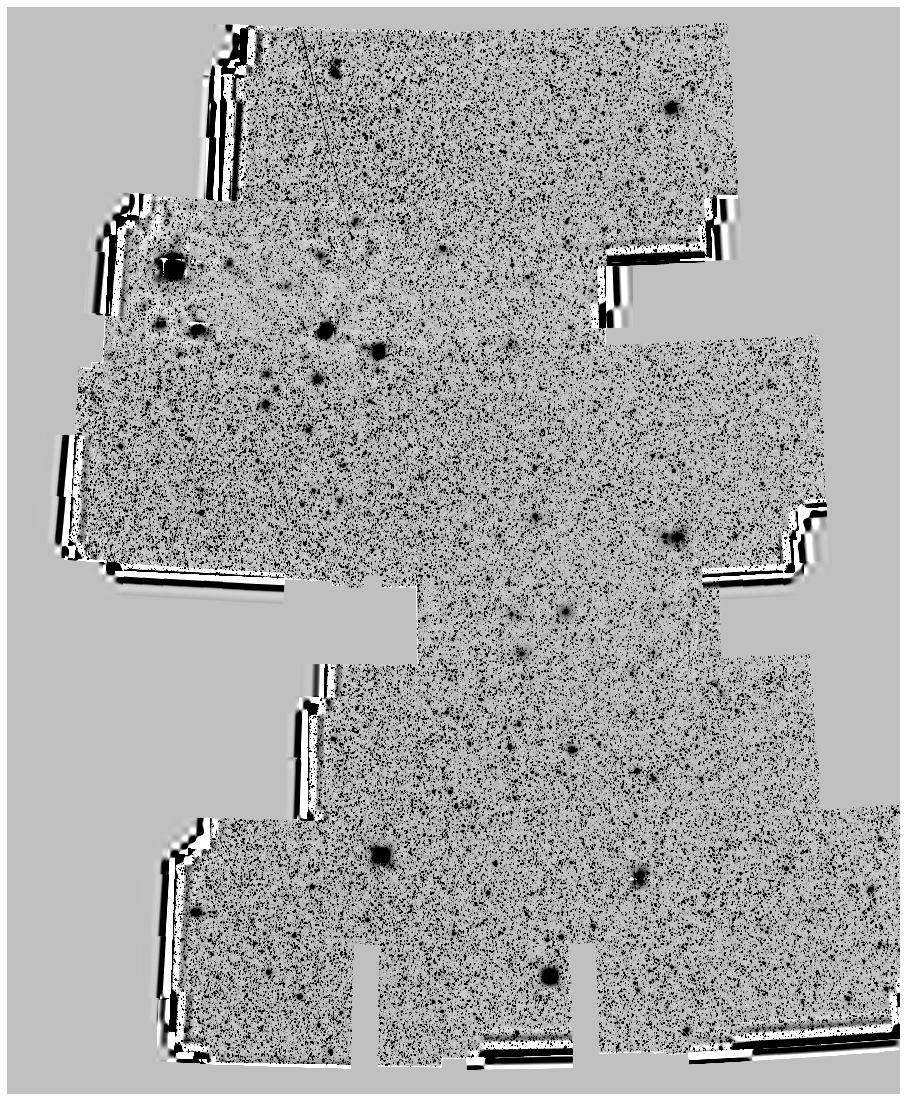

In [68]:
fig = plt.figure(figsize = (20, 20))
plt.imshow(coadd_out, cmap = 'gray_r', vmin = np.percentile(coadd_out, 5), vmax = np.percentile(coadd_out, 95), origin = 'lower')
plt.axis('off')